Objective: Build an XGBoost model for predicting heart disease and experiment with hyperparameter tuning to improve its performance.

Dataset: Heart Disease UCI

# **Task 1: Data Loading and Exploration**
Load the Heart Disease UCI dataset.
Explore the dataset to understand its structure and features.
Split the data into training and testing sets.

In [ ]:

import pandas as pd
url="https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
!pip install ucimlrepo

from ucimlrepo import fetch_ucirepo

heart_disease = fetch_ucirepo(id=45)

X = heart_disease.data.features
y = heart_disease.data.targets


print(heart_disease.metadata)

print(heart_disease.variables)

{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M. Pfisterer, J. Schmid, S. Sa

In [ ]:
X.shape

(303, 13)

In [ ]:
y.shape

(303, 1)

In [ ]:
X.head

<bound method NDFrame.head of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   1       145   233    1        2      150      0      2.3   
1     67    1   4       160   286    0        2      108      1      1.5   
2     67    1   4       120   229    0        2      129      1      2.6   
3     37    1   3       130   250    0        0      187      0      3.5   
4     41    0   2       130   204    0        2      172      0      1.4   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   45    1   1       110   264    0        0      132      0      1.2   
299   68    1   4       144   193    1        0      141      0      3.4   
300   57    1   4       130   131    0        0      115      1      1.2   
301   57    0   2       130   236    0        2      174      0      0.0   
302   38    1   3       138   175    0        0      173      0      0.0   

     slope   ca  thal  
0        3  0.0   6.0  
1        

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [ ]:
print("Training set size", X_train.shape)

Training set size (242, 13)


In [ ]:
print("Test set size", X_test.shape)

Test set size (61, 13)


# **Task 2: Data Preprocessing**
Handle missing values if any.
Encode categorical variables using appropriate methods.
Standardize or normalize numerical features if necessary.

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
X_train.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          3
thal        2
dtype: int64

In [ ]:
collection_f = X.select_dtypes(include= ["float64", "int64"]).columns

In [ ]:
collection_f

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [ ]:
blame = SimpleImputer(strategy="mean")

In [ ]:
X_train[collection_f] = blame.fit_transform(X_train[collection_f])

In [ ]:
X_test[collection_f] = blame.transform(X_test[collection_f])

In [ ]:
X_train.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64

In [ ]:
categoric_f = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"]

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), collection_f),
        ("cat", OneHotEncoder(sparse_output=False), categoric_f)
    ]
)

preprocessor.set_output(transform="pandas")

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')),
                                ('cat', OneHotEncoder(sparse_output=False),
                                 ['sex', 'cp', 'fbs', 'restecg', 'exang',
                                  'slope', 'ca', 'thal'])])

In [ ]:
X_train_p= preprocessor.fit_transform(X_train)

In [ ]:
X_test_p = preprocessor.transform(X_test)

# **Task 3: Initial XGBoost Model**
Build an initial XGBoost model using default hyperparameters.
Train the model on the training set and evaluate its performance on the testing set.
Note down the accuracy and any other relevant metrics.

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

xgb_model = XGBClassifier(random_state=42)

xgb_model.fit(X_train_p, y_train)
xgb_predictions = xgb_model.predict(X_test_p)


default_accuracy = accuracy_score(y_test, xgb_predictions)
print(f'Test accuracy {default_accuracy}')

Test accuracy 0.45901639344262296


# **Task 4: Hyperparameter Tuning**
Experiment with hyperparameter tuning to improve model performance.
Adjust hyperparameters such as learning_rate, n_estimators, max_depth, etc.
Use techniques like cross-validation to find optimal hyperparameters.
Train and evaluate the model with the tuned hyperparameters.

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'n_estimators': [100, 200, 300]
}

In [ ]:
xgb_model = XGBClassifier(random_state=42)
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring="accuracy")


In [ ]:
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

In [ ]:
preds = best_model.predict(X_test)
acc_best = accuracy_score(y_test, preds)
acc_best

0.5081967213114754


# Task 5: Feature Importance

Explore feature importance using the feature_importances_ attribute of the trained XGBoost mode
Identify the most important features for heart disease prediction.


In [ ]:
import matplotlib.pyplot as plt

<Axes: title={'center': 'Feature '}>

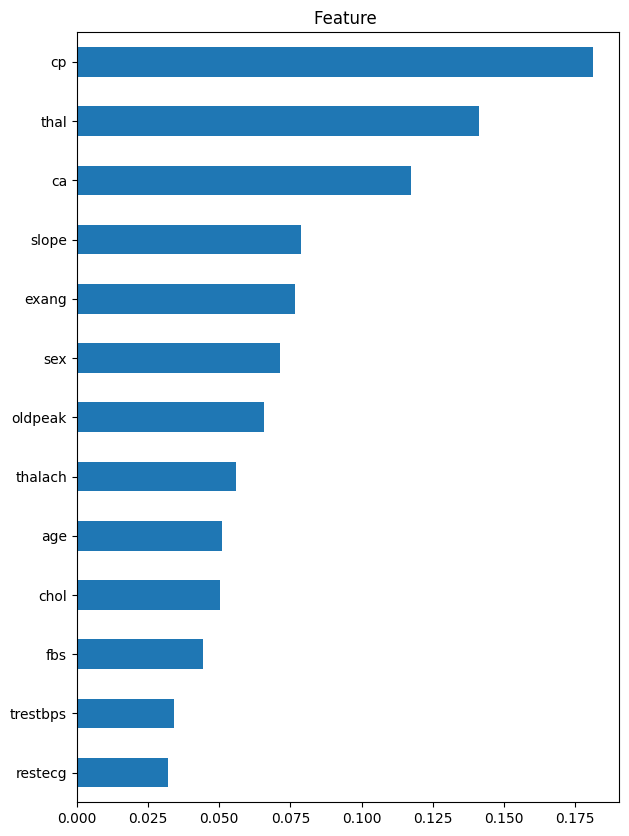

In [ ]:
crucial = pd.Series(best_model.feature_importances_, index=X_train.columns).sort_values()


crucial.plot.barh(title="Feature ", figsize=(7, 10))

## Task 6: Model Evaluation

Compare the performance metrics of the initial model and the tuned model.
Visualize the improvement achieved in a clear and concise manner.
Discuss the impact of hyperparameter tuning and feature importance on model performance.

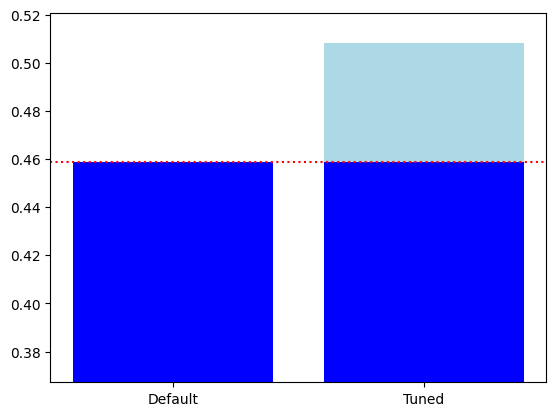

In [ ]:

val1=[default_accuracy,default_accuracy]
plt.bar(["Default","Tuned"],val1,color='blue')
plt.bar(["Default","Tuned"],[0,acc_best-default_accuracy],bottom=val1,color='lightblue')

plt.axhline(y=default_accuracy, color='red', linestyle='dotted')

plt.ylim(default_accuracy-(default_accuracy/5),acc_best+(acc_best/40))
plt.show()